<a href="https://colab.research.google.com/github/Sockcave/GGWP/blob/main/PlayerProfilesMark2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Player Profiles**#
* Creating profiles/categories for players based on their toxicity level.

In [372]:
pip install boto3

In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from textblob import TextBlob
import re

##**Loading the data with the cleaned labels**##

In [376]:
data = pd.read_csv('data2.csv')
data = data.iloc[:, 1:]
data['match_num'] = data['match']
data['slot_num'] = data['slot']
data.head()

,match,slot,time,text,toxic,obscene,threat,insult,identity_hate,total_score,avg,match_num,slot_num
0,0,9,1808.40822,100%,0,0,0,0,0,0,0.0,0,9
1,2,6,1238.43090,carry,0,0,0,0,0,0,0.0,2,6
2,2,0,1248.42850,yes dog,0,0,0,0,0,0,0.0,2,0
3,2,0,1559.05260,yeah,0,0,0,0,0,0,0.0,2,0
4,2,0,1563.18490,fast and furious,0,0,0,0,0,0,0.0,2,0


##**Player Profiles Mark 2**##
* Creating profiles/categories for players based on their toxicity level.
* Trying to learn more about the players.
* Why were they toxic? Reasons for toxicity should be included in insight report.

* Traits of categories: Who was toxic first? Who was toxic only in return?

In [377]:
data2 = data.copy(deep=True)
data2.head()

,match,slot,time,text,toxic,obscene,threat,insult,identity_hate,total_score,avg,match_num,slot_num
0,0,9,1808.40822,100%,0,0,0,0,0,0,0.0,0,9
1,2,6,1238.43090,carry,0,0,0,0,0,0,0.0,2,6
2,2,0,1248.42850,yes dog,0,0,0,0,0,0,0.0,2,0
3,2,0,1559.05260,yeah,0,0,0,0,0,0,0.0,2,0
4,2,0,1563.18490,fast and furious,0,0,0,0,0,0,0.0,2,0


In [378]:
data2['total_score'].unique()

array([0, 1, 2, 3, 4, 5])

Text(0.5, 1.0, 'Distribution of Time')

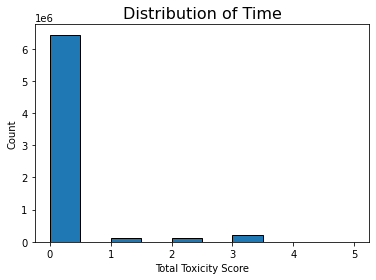

In [379]:
# Most players aren't that toxic as we can seen in the following histogram, if we are looking at total toxicity scores.
plt.hist(data2['total_score'], ec = 'black')
plt.xlabel('Total Toxicity Score')
plt.ylabel('Count')
plt.title('Distribution of Time', fontsize = 16)

###**Using a weighted average toxicity score**###

In [380]:
data2['avg'].unique()

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

Text(0.5, 1.0, 'Distribution of Time')

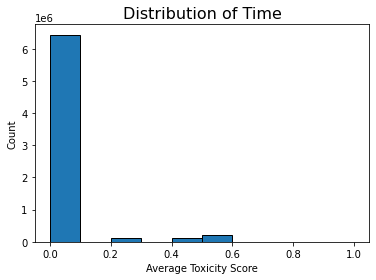

In [381]:
# Most players aren't that toxic as we can seen in the following histogram, if we are looking at total toxicity scores.
plt.hist(data2['avg'], ec = 'black')
plt.xlabel('Average Toxicity Score')
plt.ylabel('Count')
plt.title('Distribution of Time', fontsize = 16)

##**Severity of each Toxic Label**##
* Weights need to be adjusted for each toxicity label.
* A message classified as a threat is more severe than one classified as an insult.
* Survey created and sent to some gaming community servers on Discord in order to gauge moderator priority preferences. (What gamers believe are the most important types of game chat data that moderators should divert their attention to.)
* For each label, we calculate the percentage of votes for every number between 1 to 5.
> For example, for chats labeled in the category "identity_hate", 34.4% of respondents voted 5 (believing it should be given the highest of priority from moderators.

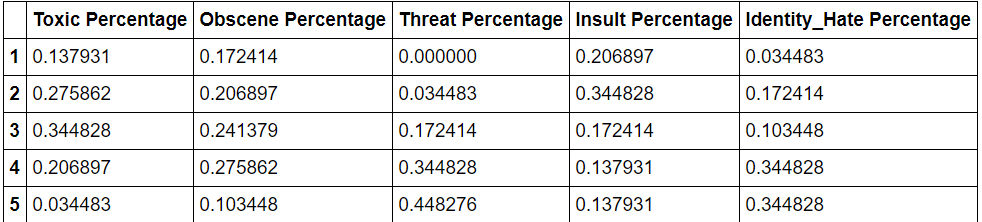

In [382]:
mod_data = pd.read_csv('percent_data.csv')
mod_data = mod_data.iloc[:, 1:6]
mod_data = mod_data.rename({0:1, 1:2, 2:3, 3:4, 4:5}, axis='index')
mod_data

,Toxic Percentage,Obscene Percentage,Threat Percentage,Insult Percentage,Identity_Hate Percentage
1,0.137931,0.172414,0.000000,0.206897,0.034483
2,0.275862,0.206897,0.034483,0.344828,0.172414
3,0.344828,0.241379,0.172414,0.172414,0.103448
4,0.206897,0.275862,0.344828,0.137931,0.344828
5,0.034483,0.103448,0.448276,0.137931,0.344828


In [383]:
# For example, percentage of people who believe threats should be given the highest priority from moderators.
# 50%
mod_data['Threat Percentage'][5]

0.4482758620689655

###**Grouped by Matches**###
* We can now identify specific players from specific matches.

In [384]:
matches = data2.groupby(['match_num', 'slot_num']).first()
matches

match  slot        time  ... identity_hate  total_score  avg
match_num slot_num                            ...                                
0         9              0     9  1808.40822  ...             0            0  0.0
2         0              2     0  1248.42850  ...             0            0  0.0
          2              2     2  2009.43790  ...             0            0  0.0
          6              2     6  1238.43090  ...             0            0  0.0
3         3              3     3  2212.78120  ...             0            0  0.0
...                    ...   ...         ...  ...           ...          ...  ...
999998    6         999998     6  1709.49237  ...             0            0  0.0
          7         999998     7    59.56197  ...             0            0  0.0
          8         999998     8   917.21927  ...             0            2  0.4
999999    0         999999     0   974.04976  ...             0            0  0.0
          3         999999     3  2674.38856  ...             0            0  0.0

[2326491 rows x 11 columns]

In [385]:
# For example, we can look into match 999998 and see that three messages were sent in the entire game.
# One of which sent in the middle of the game was classified as toxic by our model.
matches[matches['match'] == 999998].sort_values('time')

match  slot        time  ... identity_hate  total_score  avg
match_num slot_num                            ...                                
999998    7         999998     7    59.56197  ...             0            0  0.0
          8         999998     8   917.21927  ...             0            2  0.4
          6         999998     6  1709.49237  ...             0            0  0.0

[3 rows x 11 columns]

##**Testing random subsets of the data**##

In [386]:
#Extracting a single match to test function on.
test_row = matches[matches['match'] == 999998].sort_values('time')
test_row

match  slot        time  ... identity_hate  total_score  avg
match_num slot_num                            ...                                
999998    7         999998     7    59.56197  ...             0            0  0.0
          8         999998     8   917.21927  ...             0            2  0.4
          6         999998     6  1709.49237  ...             0            0  0.0

[3 rows x 11 columns]

In [387]:
# Getting the last 10 matches
last10 = matches[(matches['match'] >=999990) & (matches['match'] <=999999)]
last10

match  slot        time  ... identity_hate  total_score  avg
match_num slot_num                            ...                                
999990    9         999990     9   651.20770  ...             0            0  0.0
999991    0         999991     0  2209.32845  ...             0            0  0.0
          1         999991     1  1921.68195  ...             0            0  0.0
          3         999991     3  1467.57495  ...             0            0  0.0
          8         999991     8  1519.56225  ...             0            0  0.0
999992    1         999992     1   345.65152  ...             0            0  0.0
          5         999992     5    13.96965  ...             0            0  0.0
          7         999992     7  1471.34332  ...             0            0  0.0
          8         999992     8  1828.38942  ...             0            0  0.0
999993    1         999993     1   748.38394  ...             0            0  0.0
          2         999993     2  1213.07044  ...             0            0  0.0
          7         999993     7  1427.45144  ...             0            0  0.0
          9         999993     9  1035.51384  ...             0            0  0.0
999994    9         999994     9  2891.66590  ...             0            0  0.0
999995    9         999995     9  2962.48182  ...             0            0  0.0
999996    6         999996     6  1571.98995  ...             0            0  0.0
999997    1         999997     1   609.78443  ...             0            0  0.0
          2         999997     2   -37.85743  ...             0            0  0.0
          3         999997     3   324.25418  ...             0            0  0.0
          6         999997     6   849.99243  ...             0            0  0.0
          9         999997     9   616.11623  ...             0            0  0.0
999998    6         999998     6  1709.49237  ...             0            0  0.0
          7         999998     7    59.56197  ...             0            0  0.0
          8         999998     8   917.21927  ...             0            2  0.4
999999    0         999999     0   974.04976  ...             0            0  0.0
          3         999999     3  2674.38856  ...             0            0  0.0

[26 rows x 11 columns]

In [388]:
# Testing looping through all the chat messages in a subset of matches
for i in last10['match'].unique():
  for j in range(len(last10[last10['match'] == i])):
    print(last10[last10['match'] == i].iloc[j, :]['text'])

MRAZ
please report pudge
Pudge is farming woods
rgrgww
????
injoker is misisng
WEW
lol
u
this lycan
Btw
Aweroaperkhore
go feed
GG WP
ggwp
lol
that lucky bash
putin spotted :D
FF
lol sf
???
baited
hes not coming back
damn you!!!!
sec please
ggwp lol


##**Player Profile Report Generator Mark 2**##
* First extracting the player identity from each match and testing for each of the classification labels.

In [389]:
#An indicator function
def low_upper(lower_arg, upper_arg):
  if lower_arg >= upper_arg:
    return'low'
  else:
    return 'high'

In [390]:
def is_toxic(row):
  toxic = (row['toxic'] == 1)
  lower = mod_data['Toxic Percentage'][1] + mod_data['Toxic Percentage'][2] + mod_data['Toxic Percentage'][3]
  upper = mod_data['Toxic Percentage'][3] + mod_data['Toxic Percentage'][4] + mod_data['Toxic Percentage'][5]
  majority = max(lower, upper)
  majority_percentage = np.round(majority*100, 2)
  ind = low_upper(lower, upper)
  if toxic:
    print('\n-Player ' + str(row['slot']) + ' from match ' + str(row['match']) + ' sent a chat message that is potentially toxic.')
    print('\n\t (' + str(majority_percentage) + '% of players generally believe this is of ' + str(ind) + ' concern.)')
  else:
    print('\n\-Not being toxic.')
def toxic_ind(row):
  toxic = (row['toxic'] == 1)
  if toxic:
    return True
  else:
    return False

In [391]:
is_toxic(test_row.iloc[1, :])


-Player 8 from match 999998 sent a chat message that is potentially toxic.

	 (75.86% of players generally believe this is of low concern.)


In [392]:
def is_obscene(row):
  obscene = (row['obscene'] == 1)
  lower = mod_data['Obscene Percentage'][1] + mod_data['Obscene Percentage'][2] + mod_data['Obscene Percentage'][3]
  upper = mod_data['Obscene Percentage'][3] + mod_data['Obscene Percentage'][4] + mod_data['Obscene Percentage'][5]
  majority = max(lower, upper)
  majority_percentage = np.round(majority*100, 2)
  ind = low_upper(lower, upper)
  if obscene:
    print('\n-Player ' + str(row['slot']) + ' from match ' + str(row['match']) + ' sent a chat message that is potentially obscene.')
    print('\n\t (' + str(majority_percentage) + '% of players generally believe this is of ' + str(ind) + ' concern.)')
  else:
    print('\n\-Not being obscene.')

def obscene_ind(row):
  obscene = (row['obscene'] == 1)
  if obscene:
    return True
  else:
    return False

In [393]:
is_obscene(test_row.iloc[1, :])


-Player 8 from match 999998 sent a chat message that is potentially obscene.

	 (62.07% of players generally believe this is of low concern.)


In [394]:
def is_threat(row):
  threat = (row['threat'] == 1)
  lower = mod_data['Threat Percentage'][1] + mod_data['Threat Percentage'][2] + mod_data['Threat Percentage'][3]
  upper = mod_data['Threat Percentage'][3] + mod_data['Threat Percentage'][4] + mod_data['Threat Percentage'][5]
  majority = max(lower, upper)
  majority_percentage = np.round(majority*100, 2)
  ind = low_upper(lower, upper)
  if threat:
    print('\n-Player ' + str(row['slot']) + ' from match ' + str(row['match']) + ' sent a chat message that is potentially threatening.')
    print('\n\t (' + str(majority_percentage) + '% of players generally believe this is of ' + str(ind) + ' concern.)')
  else:
    print('\n-Not threatening.')
  
def threat_ind(row):
  threat = (row['threat'] == 1)
  if threat:
    return True
  else:
    return False

In [395]:
is_threat(test_row.iloc[1, :])


-Not threatening.


In [396]:
def is_insult(row):
  insult = (row['insult'] == 1)
  lower = mod_data['Insult Percentage'][1] + mod_data['Insult Percentage'][2] + mod_data['Insult Percentage'][3]
  upper = mod_data['Insult Percentage'][3] + mod_data['Insult Percentage'][4] + mod_data['Insult Percentage'][5]
  majority = max(lower, upper)
  majority_percentage = np.round(majority*100, 2)
  ind = low_upper(lower, upper)
  if insult:
    print('\n-Player ' + str(row['slot']) + ' from match ' + str(row['match']) + ' sent a chat message that is potentially insulting.')
    print('\n\t (' + str(majority_percentage) + '% of players generally believe this is of ' + str(ind) + ' concern.)')
  else:
    print('\n-Not being insulting.')

def insult_ind(row):
  insult = (row['insult'] == 1)
  if insult:
    return True
  else:
    return False

In [397]:
is_insult(test_row.iloc[1, :])


-Not being insulting.


In [398]:
def is_identity_hate(row):
  identity_hate = (row['identity_hate'] == 1)
  lower = mod_data['Identity_Hate Percentage'][1] + mod_data['Identity_Hate Percentage'][2] + mod_data['Identity_Hate Percentage'][3]
  upper = mod_data['Identity_Hate Percentage'][3] + mod_data['Identity_Hate Percentage'][4] + mod_data['Identity_Hate Percentage'][5]
  majority = max(lower, upper)
  majority_percentage = np.round(majority*100, 2)
  ind = low_upper(lower, upper)
  if identity_hate:
    print('\n-Player ' + str(row['slot']) + ' from match ' + str(row['match']) + ' sent a chat message that is potentially an attack on other\'s identities.')
    print('\n\t (' + str(majority_percentage) + '% of players generally believe this is of ' + str(ind) + ' concern.)')
  else:
    print('\n-No indication of an identity attack.')

def identity_hate_ind(row):
  identity_hate = (row['identity_hate'] == 1)
  if identity_hate:
    return True
  else:
    return False

In [399]:
is_identity_hate(test_row.iloc[1, :])


-No indication of an identity attack.


##**Instigator Function**##
* To determine if the player in question was the first to instigate the unwanted toxic behavior.
* If not, this function explores the chat messages sent by players in the same match to see who first did so.

In [400]:
def instigator(match_num, match_data):
  same_matches = match_data[match_data['match'] == match_num].sort_values('time')
  if len(same_matches) == 1:
    print('Original Player was likely the instigator.')
  else:
    for player in range(len(same_matches)):
      if np.count_nonzero(same_matches['avg'] > 0)>0: 
        player_row = same_matches.iloc[player, :]
        if player_row['avg'] > 0 and player_row['time'] == np.max(player_row['time']):
          if toxic_ind(player_row):
            print('\n Player ' +  str(player_row['slot']) + ' from match ' + str(player_row['match']) + ' was toxic before. Original player may have been responding to previous toxicity or contributing to it.')
          if obscene_ind(player_row):
            print('\n Player ' +  str(player_row['slot']) + ' from match ' + str(player_row['match']) + ' was exhibiting obscene behavior before. Original player may have been responding to this.')
          if threat_ind(player_row):
            print('\n Player ' +  str(player_row['slot']) + ' from match ' + str(player_row['match']) + ' was exhibiting threatening behavior before. Original player may have been responding to previous threat or contributing to the threats.')
          if insult_ind(player_row):
            print('\n Player ' +  str(player_row['slot']) + ' from match ' + str(player_row['match']) + ' was throwing insults beforehand. Original player may have been responding to these insults or contributing to these insults.')
          if identity_hate_ind(player_row):
            print('\n Player ' +  str(player_row['slot']) + ' from match ' + str(player_row['match']) + ' was attacking other identities before. Original player may have been responding to a previous identity attack or contributing to the identity attack.')
      else:
        print('Original player was likely the instigator.')
        break

In [401]:
# Testing the instigator function
instigator(618580, matches)


 Player 3 from match 618580 was throwing insults beforehand. Original player may have been responding to these insults or contributing to these insults.


##**Final Player Profile Generator Function**##
* Takes into account the instigator function

In [402]:
def profile_gen2(player_data, all_matches):
  for i in range(len(player_data)):
    row = player_data.iloc[i, :]
    print('\nPlayer ' +  str(row['slot']) + ' from match ' + str(row['match']) + ':')
    if row['avg'] == 0:
      print('\nA casual player. Their behavior has remained neutral.')
      print('\n')
      print('=' * 100)
    elif row['avg'] == 1:
      print('\nIs highly toxic. They are all around concerning. Their behavior has reached unacceptable proportions.')
      print('\nThe following moderated message: "' +  row['text'] + '". \nModerators need to step in ASAP.\n')
      instigator(row['slot'], all_matches)
      print('\nThe following lines are a breakdown of the moderated message.')
      is_toxic(row)
      is_obscene(row)
      is_threat(row)
      is_insult(row)
      is_identity_hate(row)
      print('\n')
      print('=' * 100)
    elif row['avg'] == 0.4:
      if threat_ind(row) or identity_hate_ind(row):
        print('\nIs a toxic player with some highly concerning tendencies. Their behavior is of concern.')
        print('\nThe following moderated message: "' +  row['text'] + '". \nModerators need to step in ASAP.\n')
        instigator(row['slot'], all_matches)
        print('\nThe following lines are a breakdown of the moderated message.')
        is_toxic(row)
        is_obscene(row)
        is_threat(row)
        is_insult(row)
        is_identity_hate(row)
        print('\n')
        print('=' * 100)
      else: 
        print('\nIs a casual player with some slight toxic tendencies. Their behavior is nothing too serious.')
        print('\n')
        print('=' * 100)
    elif row['avg'] == 0.6:
      if threat_ind(row) or identity_hate_ind(row) or obscene_ind(row):
        print('\nIs a toxic player with some highly concerning tendencies. Their behavior is of concern.')
        print('\nThe following moderated message: "' +  row['text'] + '". \nModerators need to step in ASAP.\n')
        instigator(row['slot'], all_matches)
        print('\nThe following lines are a breakdown of the moderated message.')
        is_toxic(row)
        is_obscene(row)
        is_threat(row)
        is_insult(row)
        is_identity_hate(row)
        print('\n')
        print('=' * 100)
      else: 
        print('\nIs a casual player with some slight toxic tendencies. Their behavior may be of concern.')
        print('\nThe following moderated message: "' +  row['text'] + '". \nModerators need to step in ASAP.\n')
        print('\n')
        print('=' * 100)
    else:
        print('\nIs a toxic player with highly concerning tendencies. Their behavior is of concern.')
        print('\nThe following moderated message: "' +  row['text'] + '". \nModerators need to step in ASAP.\n')
        instigator(row['slot'], all_matches)
        print('\nThe following lines are a breakdown of the moderated message.')
        is_toxic(row)
        is_obscene(row)
        is_threat(row)
        is_insult(row)
        is_identity_hate(row)
        print('\n')
        print('=' * 100)

In [403]:
test_row2 = matches[matches['avg'] == 1]
test_row2

,,match,slot,time,text,toxic,obscene,threat,insult,identity_hate,total_score,avg
match_num,slot_num,,,,,,,,,,,
622513,5,622513,5,-54.4867,ok i will rape you fucking faggot,1,1,1,1,1,5,1.0


In [404]:
matches.tail(5)

match  slot        time  ... identity_hate  total_score  avg
match_num slot_num                            ...                                
999998    6         999998     6  1709.49237  ...             0            0  0.0
          7         999998     7    59.56197  ...             0            0  0.0
          8         999998     8   917.21927  ...             0            2  0.4
999999    0         999999     0   974.04976  ...             0            0  0.0
          3         999999     3  2674.38856  ...             0            0  0.0

[5 rows x 11 columns]

In [405]:
profile_gen2(matches.tail(5), matches)


Player 6 from match 999998:

A casual player. Their behavior has remained neutral.



Player 7 from match 999998:

A casual player. Their behavior has remained neutral.



Player 8 from match 999998:

Is a casual player with some slight toxic tendencies. Their behavior is nothing too serious.



Player 0 from match 999999:

A casual player. Their behavior has remained neutral.



Player 3 from match 999999:

A casual player. Their behavior has remained neutral.




In [406]:
profile_gen2(test_row2, matches)


Player 5 from match 622513:

Is highly toxic. They are all around concerning. Their behavior has reached unacceptable proportions.

The following moderated message: "ok i will rape you fucking faggot". 
Moderators need to step in ASAP.

Original player was likely the instigator.

The following lines are a breakdown of the moderated message.

-Player 5 from match 622513 sent a chat message that is potentially toxic.

	 (75.86% of players generally believe this is of low concern.)

-Player 5 from match 622513 sent a chat message that is potentially obscene.

	 (62.07% of players generally believe this is of low concern.)

-Player 5 from match 622513 sent a chat message that is potentially threatening.

	 (96.55% of players generally believe this is of high concern.)

-Player 5 from match 622513 sent a chat message that is potentially insulting.

	 (72.41% of players generally believe this is of low concern.)

-Player 5 from match 622513 sent a chat message that is potentially an attack 

In [407]:
# Running on last 500 players in our data set
profile_gen2(matches.tail(500), matches)


Player 0 from match 999791:

A casual player. Their behavior has remained neutral.



Player 1 from match 999793:

A casual player. Their behavior has remained neutral.



Player 3 from match 999793:

A casual player. Their behavior has remained neutral.



Player 5 from match 999793:

A casual player. Their behavior has remained neutral.



Player 6 from match 999793:

A casual player. Their behavior has remained neutral.



Player 3 from match 999794:

Is a toxic player with highly concerning tendencies. Their behavior is of concern.

The following moderated message: "wtf". 
Moderators need to step in ASAP.

Original player was likely the instigator.

The following lines are a breakdown of the moderated message.

\-Not being toxic.

-Player 3 from match 999794 sent a chat message that is potentially obscene.

	 (62.07% of players generally believe this is of low concern.)

-Not threatening.

-Not being insulting.

-No indication of an identity attack.



Player 4 from match 999794:
